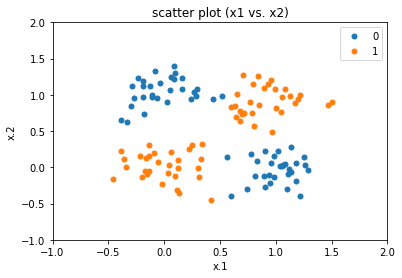

In [124]:
#1)
#Training data 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


sigma = np.sqrt(0.2)  
x1 = 0.5*np.random.normal(0,sigma,30) 
x11 =0.5*np.random.normal(2,sigma,30)
x2 = 0.5*np.random.normal(2,sigma,30) 
x21= 0.5*np.random.normal(0,sigma,30)


x1_ =  0.5*np.random.normal(0,sigma,30) 
x11_ = 0.5*np.random.normal(2,sigma,30)
x2_ =  0.5*np.random.normal(0,sigma,30) 
x21_ = 0.5*np.random.normal(2,sigma,30) 


data = np.zeros((120,3))
data[0:30,0] = x1
data[30:60,0] = x11
data[0:30,1] = x2
data[30:60,1] = x21

data[60:90,0] = x1_
data[90:120,0] = x11_
data[60:90,1] = x2_
data[90:120,1] = x21_
data[60:120,2]= 1



df = pd.DataFrame(data)
df.columns = ["x.1","x.2","y"]


#a)
def datagraph() :
   plt.figure()
   groups = df.groupby('y')
   for name, group in groups:
     plt.plot(group["x.1"], group["x.2"], marker='o', linestyle='', ms=5, label=int(name))
   plt.xlabel("x.1")
   plt.ylabel("x.2")
   plt.xlim(-1, 2)
   plt.ylim(-1,2)
   plt.legend()
   plt.title("scatter plot (x1 vs. x2)")


datagraph()


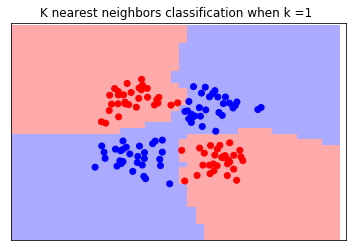

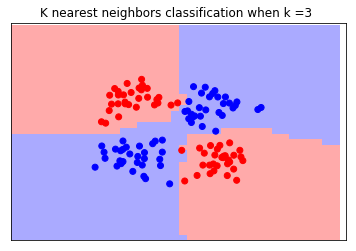

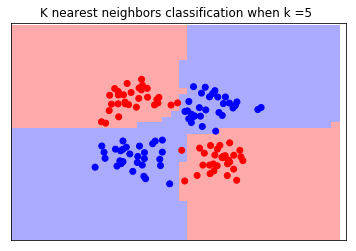

In [127]:
#2)kNN algorithm

def euclideanDistance(Vtrain_data,test_instance) :
    diss = 0
    for i in range(Vtrain_data.shape[1]) : 
       diss += (Vtrain_data[:,i] - test_instance[i])**2 
    distance  = np.sqrt(diss)
    return distance

def kNN(train_data,test_instance,k) : 
    N = train_data.shape[0]
    conc = np.zeros((N,2)) #distance and class label
    Vtrain_data = train_data.values[:,0:-1]
    distance = euclideanDistance(Vtrain_data,test_instance)
    conc[:,0]=distance
    conc[:,1]=train_data.values[:,-1]
    sconc = conc[conc[:,0].argsort()]
    kconc = sconc[0:k]
    groups = train_data.groupby('y')
    total = []
    names = []
    for name,group in groups:
       
       names.append(int(name))
       total.append(sum(kconc[:,-1]==int(name)))
    
    maxindice = np.argmax(total)
    return names[maxindice]
    
# 2a)
from matplotlib.colors import ListedColormap
def plot_boundarykNN(traindata,k):
   data = traindata.values
   x1_min, x1_max = traindata.values[:, 0].min() - 1, traindata.values[:, 0].max() + 1
   x2_min, x2_max = traindata.values[:, 1].min() - 1, traindata.values[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))
   predicted = []
   for i in np.c_[xx1.ravel(), xx2.ravel()]:
      predicted.append(kNN(traindata,i,k))  
   predicted = np.array(predicted).reshape((xx1.shape))
   cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
   cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
   plt.figure()
   plt.contourf(xx1,xx2,predicted,alpha=0.4)
   plt.set_cmap(plt.cm.Paired)
   plt.pcolormesh(xx1, xx2, predicted,cmap=cmap_light)
   plt.xlim(x1_min, x1_max)
   plt.ylim(x2_min,x2_max)
   plt.xticks(())
   plt.yticks(())
   plt.figure(1, figsize=(4, 3))
   plt.scatter(traindata.values[:,0], traindata.values[:,1],c=traindata.values[:,-1],cmap=cmap_bold,marker='o')
   plt.title("K nearest neighbors classification when k =%d "%k)
   plt.show()

plot_boundarykNN(df,1)
plot_boundarykNN(df,3)
plot_boundarykNN(df,5)

#when k decreasing it gives more accurate decision boundary. 



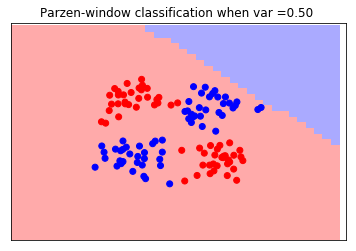

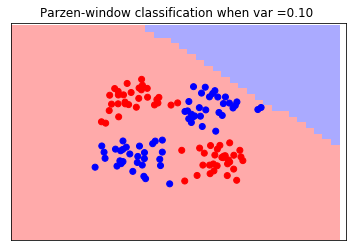

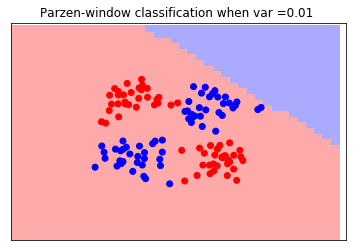

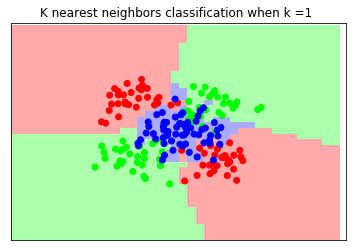

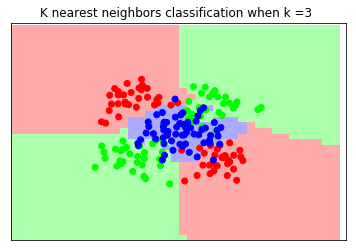

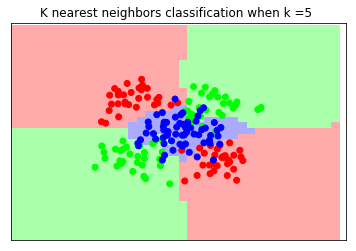

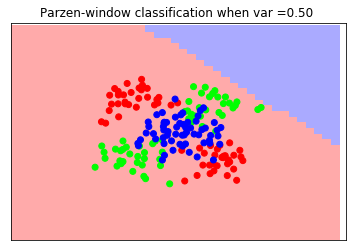

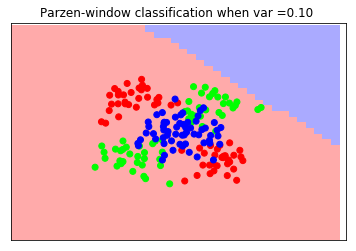

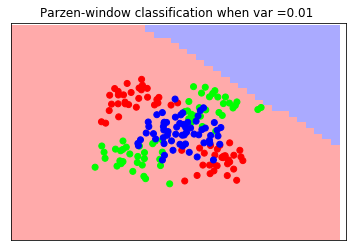

In [128]:
#3)
def panzer_window(train_data,query_point,var) :
    ksum =np.exp(-1./2*var)*euclideanDistance(train_data.values[:,0:-1],query_point)**2
    groups = train_data.groupby('y')
    total = []
    names = []
    for name,group in groups: 
       k = np.exp(-1./2*var)*euclideanDistance(group.values[:,0:-1],query_point)**2
       names.append(int(name))
       total.append(sum(k)/sum(ksum))
    maxvalue = np.argmax(total)
    return names[maxvalue]

#a)

def plot_boundaryPanzer(data,var):
   x1_min, x1_max = data.values[:, 0].min() - 1, data.values[:, 0].max() + 1
   x2_min, x2_max = data.values[:, 1].min() - 1, data.values[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))
   predictedpanzer = []
   for i in np.c_[xx1.ravel(), xx2.ravel()]:
      predictedpanzer.append(panzer_window(data,i,var))  
   predictedpanzer = np.array(predictedpanzer).reshape((xx1.shape))
   cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
   cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
   plt.figure()
   plt.contourf(xx1,xx2,predictedpanzer,alpha=0.4)
   plt.set_cmap(plt.cm.Paired)
   plt.pcolormesh(xx1, xx2, predictedpanzer,cmap=cmap_light)
   plt.xlim(x1_min, x1_max)
   plt.ylim(x2_min,x2_max)
   plt.xticks(())
   plt.yticks(())
   plt.figure(1, figsize=(4, 3))
   plt.scatter(data.values[:,0], data.values[:,1],c=data.values[:,-1],cmap=cmap_bold,marker='o')
   plt.title("Parzen-window classification when var =%.2f "%var)
   plt.show()    
        
plot_boundaryPanzer(df,0.5)    
plot_boundaryPanzer(df,0.1)
plot_boundaryPanzer(df,0.01)

#b)

sigma = np.sqrt(0.05)  
x1_=np.random.normal(0.5,sigma,60) 
x2_=np.random.normal(0.5,sigma,60)
 
datalast = np.zeros((180,3))
datalast[0:120,:] = data
datalast[120:180,0] = x1_
datalast[120:180,1] = x2_
datalast[120:180,2]= 2
data1 = datalast
df1 = pd.DataFrame(data1)
df1.columns = ["x.1","x.2","y"]

plot_boundarykNN(df1,1)
plot_boundarykNN(df1,3)
plot_boundarykNN(df1,5)
plot_boundaryPanzer(df1,0.5)    
plot_boundaryPanzer(df1,0.1)
plot_boundaryPanzer(df1,0.01)








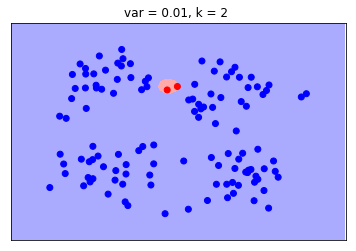

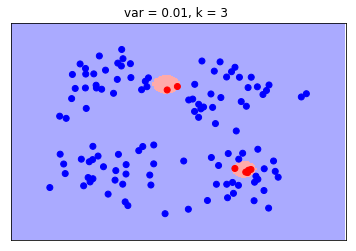

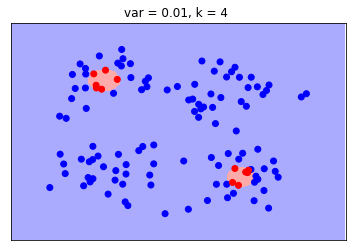

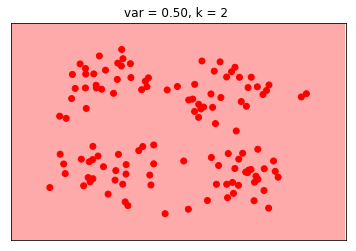

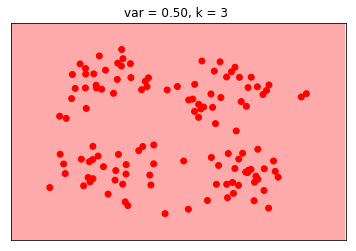

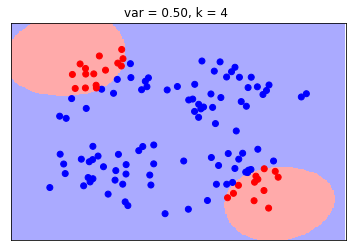

In [129]:
## Ex. 4
def K_dist(x,elt,sigma):
    return np.exp(-(0.5/sigma)*(np.linalg.norm(x-np.array([elt[0],elt[1]])))**2)
def find_representatives(k,dataset):
    X = dataset[:,:2]
    kmeans = KMeans(n_clusters=k).fit(X)
    return kmeans.cluster_centers_

def sign(x):
    return int(x>=0)
    
def predicted_class(w,x,rep,sigma):
    distances = []
    for i in range(len(rep)):
        dist = K_dist(x, rep[i], sigma)
        distances.append(dist)
    distances = np.array([1] + distances)
    product = np.dot(w.T, distances)
    return sign(product)
    
def weight(dataset,rep,sigma):
   distances = []
   for elmt in dataset:
       myDist = []
       for i in range(len(rep)):
           dist = K_dist(elmt[:2], rep[i], sigma)
           myDist.append(dist)
       distances.append([1] + myDist)
   distances = np.array(distances)
   distances = distances.T

   dotDistance = np.dot(distances, distances.T)
   invDotDistance = np.linalg.inv(dotDistance)
   produit = np.dot(invDotDistance, distances)
   resultat = np.dot(produit, dataset[:, 2])
   
   return resultat
           
#print np.array(weight(dataset,find_representatives(3,dataset),0.1)).shape

def RBFN(dataset,k,sigma):
    rep = find_representatives(k,dataset)
    w = weight(dataset,rep,sigma)
    y = np.array([predicted_class(w,elt,rep,sigma) for elt in dataset[:,:2]])
    return [y,rep,w]

#print RBFN(dataset,4,0.5)
#print predicted_class(np.random.normal(0,0.1,3+1),[1,0],find_representatives(3,dataset),0.1)

def plot_boundaryRBFN(data,var,w,rep,y,k):
   x1_min, x1_max = min(data[:,0]) - 0.3, max(data[:,0]) + 0.3
   x2_min, x2_max = min(data[:,1]) - 0.3, max(data[:,1]) + 0.3
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                     np.arange(x2_min, x2_max, 0.01))
   predicted = []
   for i in np.c_[xx1.ravel(), xx2.ravel()]:
      predicted.append(predicted_class(w,i,rep,var))  
   predicted = np.array(predicted).reshape((xx1.shape))
   cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
   cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
   plt.figure()
   plt.contourf(xx1,xx2,predicted,alpha=0.4)
   plt.set_cmap(plt.cm.Paired)
   plt.pcolormesh(xx1, xx2, predicted,cmap=cmap_light)
   plt.xlim(x1_min, x1_max)
   plt.ylim(x2_min, x2_max)
   plt.xticks(())
   plt.yticks(())
   plt.figure(1)
   plt.scatter(data[:,0], data[:,1],c=y,cmap=cmap_bold,marker='o')
   plt.title("var = %.2f, k = %.0f "%(var,k))
   plt.show()

def plot_RBFN(dataset,k,sigma) :
    rbf = RBFN(dataset,k,sigma)
    y, rep, w = rbf[0], rbf[1], rbf[2]
    plot_boundaryRBFN(dataset,sigma,w,rep,y,k)
dataset = df.values    
plot_RBFN(dataset,2,0.01)
plot_RBFN(dataset,3,0.01)
plot_RBFN(dataset,4,0.01)
plot_RBFN(dataset,2,0.5)
plot_RBFN(dataset,3,0.5)
plot_RBFN(dataset,4,0.5)

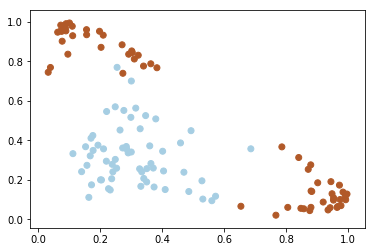

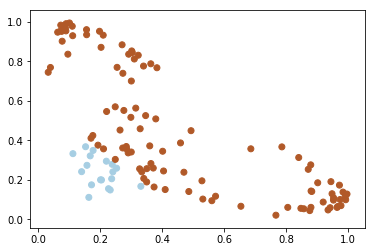

In [130]:
#b)

def rbf_2(dataset,sigma):
    rep = [[0,0],[1,1]]
    w = weight(dataset,rep,sigma)
    y = np.array([predicted_class(w,elt,rep,sigma) for elt in dataset[:,:2]])
    return y

def phi(dataset,sigma):
    phi1 = np.zeros(len(dataset))
    phi2 = np.zeros(len(dataset))
    for i in range(len(dataset)):
        phi1[i] = K_dist([0,0],dataset[i,:2],sigma)
        phi2[i] = K_dist([1,1],dataset[i,:2],sigma)
    return [phi1,phi2]
dataset = df.values
res = phi(dataset,0.45)
plt.scatter(res[0],res[1],c=dataset[:,2])
plt.show()

plt.scatter(res[0],res[1],c=rbf_2(dataset,0.45))
plt.show()
